CodeClause : Data science intern

Batch-september 2022

Name : Merna alaa elden ibrahim

Project name : Gold price prediction

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import io

In [32]:
from google.colab import files
uploaded = files.upload()


Saving gold price data.csv to gold price data (3).csv


In [33]:
df = pd.read_csv(io.BytesIO(uploaded['gold price data.csv']))
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [36]:
df.duplicated().sum()

0

In [37]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [38]:
df = df.drop(['Date'] , axis=1)
df


,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


In [39]:
df.shape

(2290, 5)

In [40]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [41]:
correlation = df.corr()

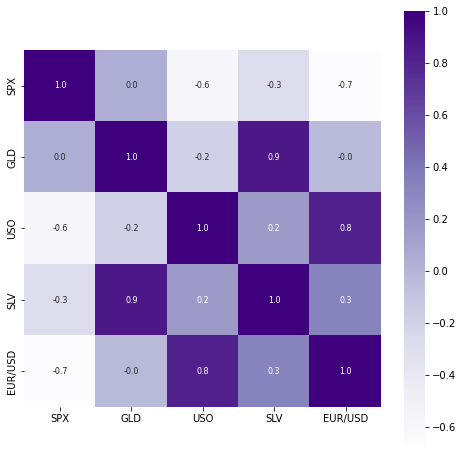

In [42]:
#representing correlation between features
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Purples')

In [43]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


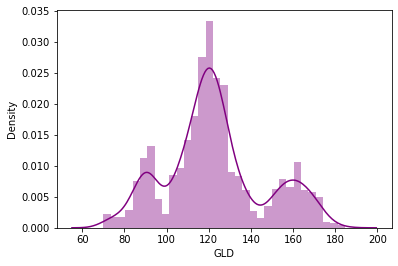

In [44]:
sns.distplot(df['GLD'],color='purple')

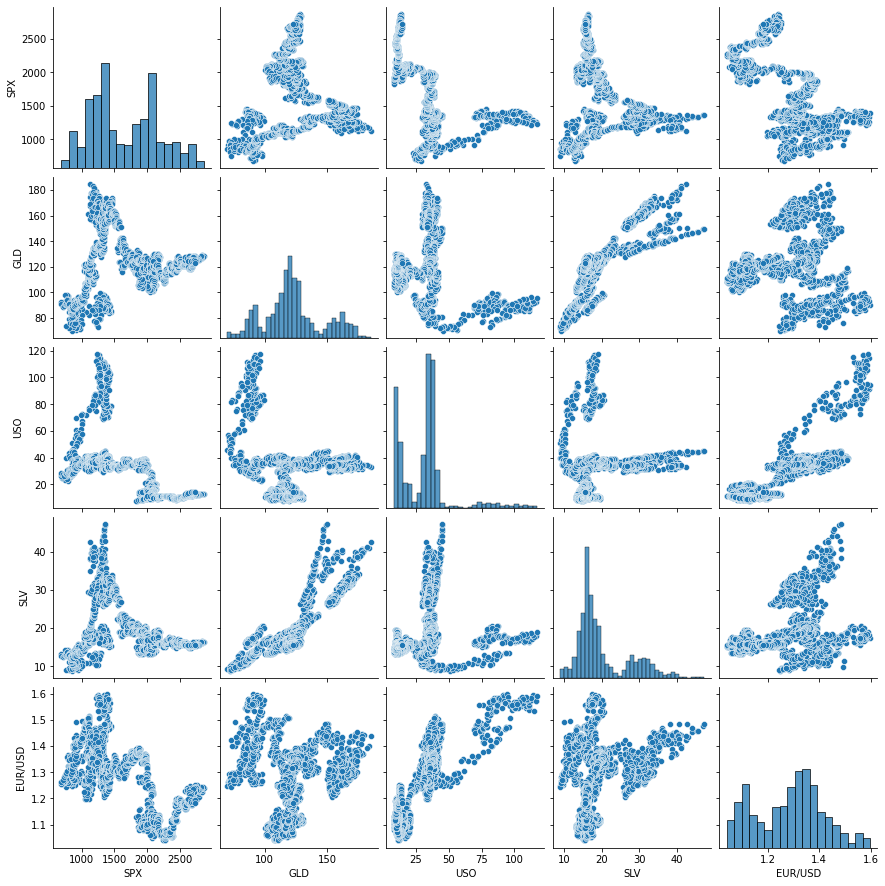

In [71]:
sns.pairplot(df)

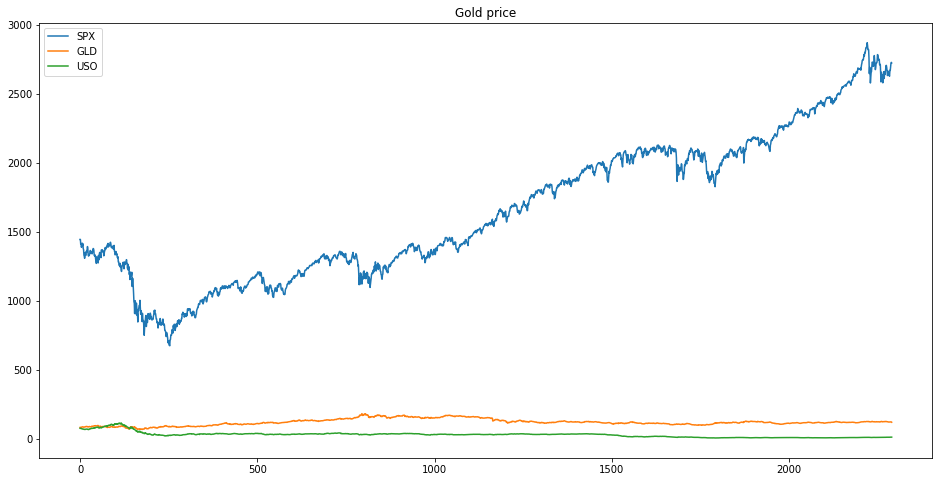

In [73]:
df['SPX'].plot(label='SPX',figsize=(16,8),title='Gold price')
df['GLD'].plot(label='GLD')
df['USO'].plot(label='USO')
plt.legend()
plt.show()

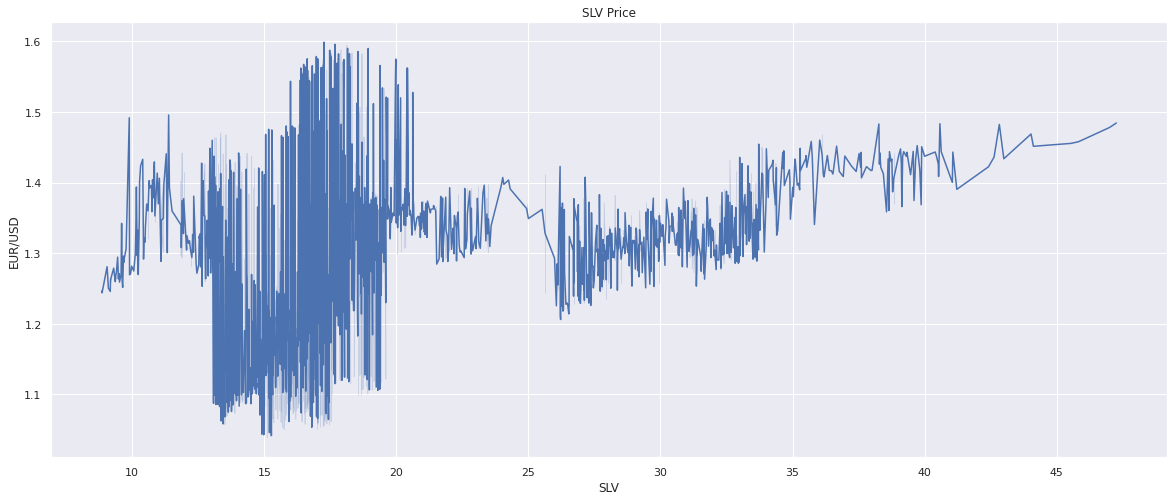

In [76]:
sns.lineplot(x="SLV", y="EUR/USD", data=df )
plt.title('SLV Price')
sns.set(rc = {'figure.figsize':(20,8)})
plt.show()

In [45]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [46]:
x = df.drop(['GLD'],axis=1)
y = df['GLD']
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [47]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [49]:
x_train =scaler.fit_transform(x_train)
x_test =scaler.fit_transform(x_test)

In [50]:
#feature scaling to normalize data
scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train)
x_train = scaling.transform(x_train)
x_test = scaling.transform(x_test)

In [52]:
regressor = RandomForestRegressor(n_estimators=100)

In [53]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [54]:
test_data_prediction = regressor.predict(x_test)
test_data_prediction

array([122.95599997, 131.26940103, 129.11740015,  97.78799942,
       119.26230035, 115.8940001 , 124.71670141, 119.50980045,
       108.46529987, 104.92269912,  96.66990151, 168.09689825,
       151.16770163, 116.4282984 , 172.07319982,  86.32049959,
       122.8599985 , 111.67699834, 114.27649858, 132.37630059,
       124.48999901, 114.82519929, 116.42249824, 108.58849999,
       111.38090063, 126.25059873, 124.05960032, 113.78399947,
       112.94209986, 125.41079886, 150.61070194,  89.87889988,
       168.77110012, 115.67860002, 107.58810038, 121.49670033,
       141.11569908, 162.43720022, 173.90860043, 153.16720196,
       120.10820093, 114.52760085, 121.59270077, 114.02509942,
       122.16367669, 107.75499987,  88.61969967, 114.49839988,
       131.0950021 , 118.37790054, 108.27909954, 131.14770246,
       107.6909014 , 160.96140043, 132.22840068, 123.45869996,
       148.98839948, 131.91000258,  96.1344011 , 124.70240052,
       117.205998  ,  86.6270995 , 105.94899981, 113.61

In [56]:
error = metrics.r2_score(y_test, test_data_prediction)
print("Error : ", error)

Error :  0.9769425320979647


In [57]:
y_test = list(y_test)

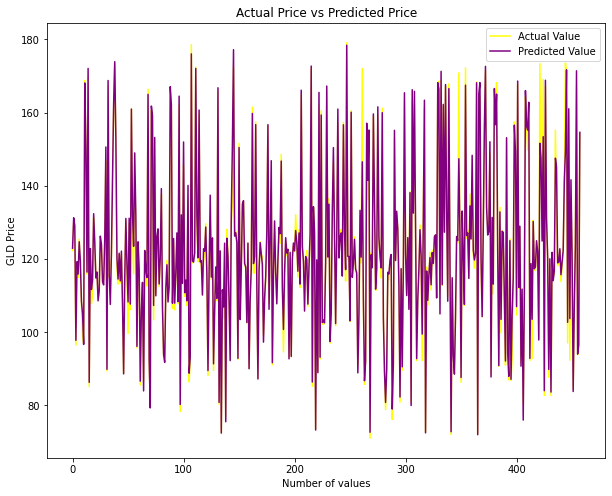

In [58]:
plt.figure(figsize = (10,8))
plt.plot(y_test, color='yellow', label = 'Actual Value')
plt.plot(test_data_prediction, color='purple', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [66]:
import xgboost as xgb
boost = xgb.XGBClassifier()
boost.fit(x_train , y_train)


XGBClassifier(objective='multi:softprob')

In [70]:
xgb = boost.predict(x_test)
error = metrics.r2_score(y_test,xgb)
print("Error : ", error)

Error :  0.8845379664924937


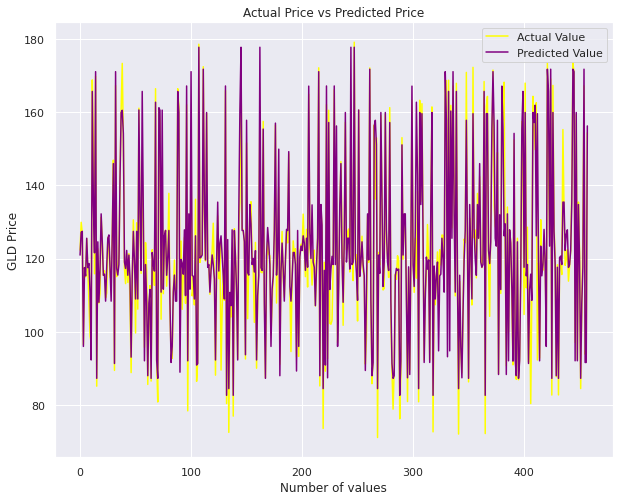

In [78]:
plt.figure(figsize = (10,8))
plt.plot(y_test, color='yellow', label = 'Actual Value')
plt.plot(xgb, color='purple', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()